David Rodríguez Gerrard

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

1 Dataset

In [2]:
# Cargar el dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data"
column_names = ["mpg", "cylinders", "displacement", "horsepower", "weight", "acceleration", "model year", "origin", "car name"]
df = pd.read_csv(url, delim_whitespace=True, names=column_names)

C:\Users\DevRoger\AppData\Local\Temp\ipykernel_5952\512478763.py:4: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(url, delim_whitespace=True, names=column_names)


In [3]:
# Ver las primeras filas del dataset
print(df.head())

    mpg  cylinders  displacement horsepower  weight  acceleration  model year  \
0  18.0          8         307.0      130.0  3504.0          12.0          70   
1  15.0          8         350.0      165.0  3693.0          11.5          70   
2  18.0          8         318.0      150.0  3436.0          11.0          70   
3  16.0          8         304.0      150.0  3433.0          12.0          70   
4  17.0          8         302.0      140.0  3449.0          10.5          70   

   origin                   car name  
0       1  chevrolet chevelle malibu  
1       1          buick skylark 320  
2       1         plymouth satellite  
3       1              amc rebel sst  
4       1                ford torino  


2 Los datos

In [4]:
# Reemplazar los valores '?' en horsepower por NaN y convertir a float
df['horsepower'] = pd.to_numeric(df['horsepower'], errors='coerce')

# Manejo de valores faltantes
print("Valores faltantes por columna:\n", df.isnull().sum())
df.fillna(df['horsepower'].median(), inplace=True)

Valores faltantes por columna:
 mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64


In [5]:
# Eliminamos la columna 'car name' ya que no aporta información numérica relevante
df.drop(columns=['car name'], inplace=True)

In [6]:
# Convertir la variable 'origin' en variables dummy
df = pd.get_dummies(df, columns=['origin'], prefix='origin')

In [8]:
# Normalización de los datos
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

In [15]:
# Discretizar la variable objetivo 'mpg' en categorías
num_bins = 5
df_scaled['mpg_category'] = pd.cut(df['mpg'], bins=num_bins, labels=False)
y = df_scaled['mpg_category']
df_scaled.drop(columns=['mpg'], inplace=True)

3 Matrices y SelecKBest

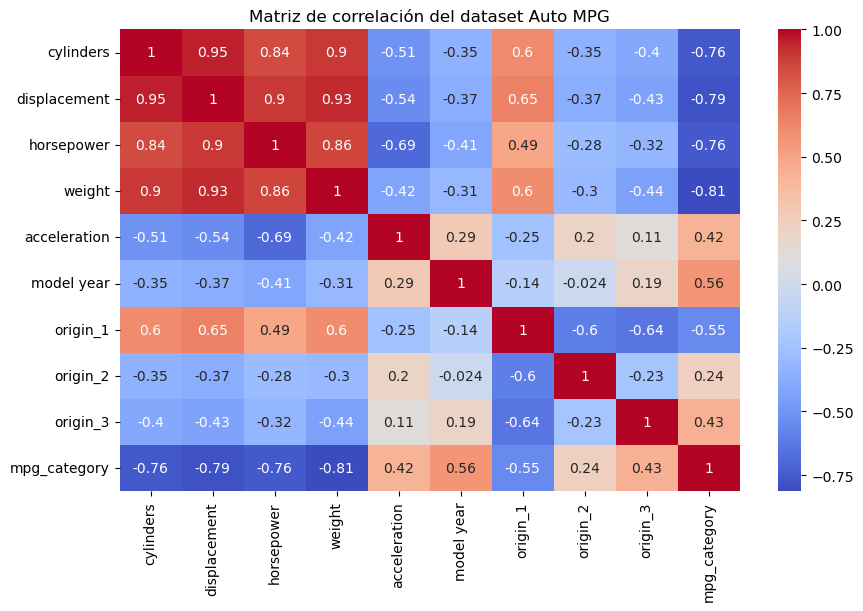

In [16]:
# Matriz de correlación
plt.figure(figsize=(10,6))
sns.heatmap(df_scaled.corr(), annot=True, cmap="coolwarm")
plt.title("Matriz de correlación del dataset Auto MPG")
plt.show()

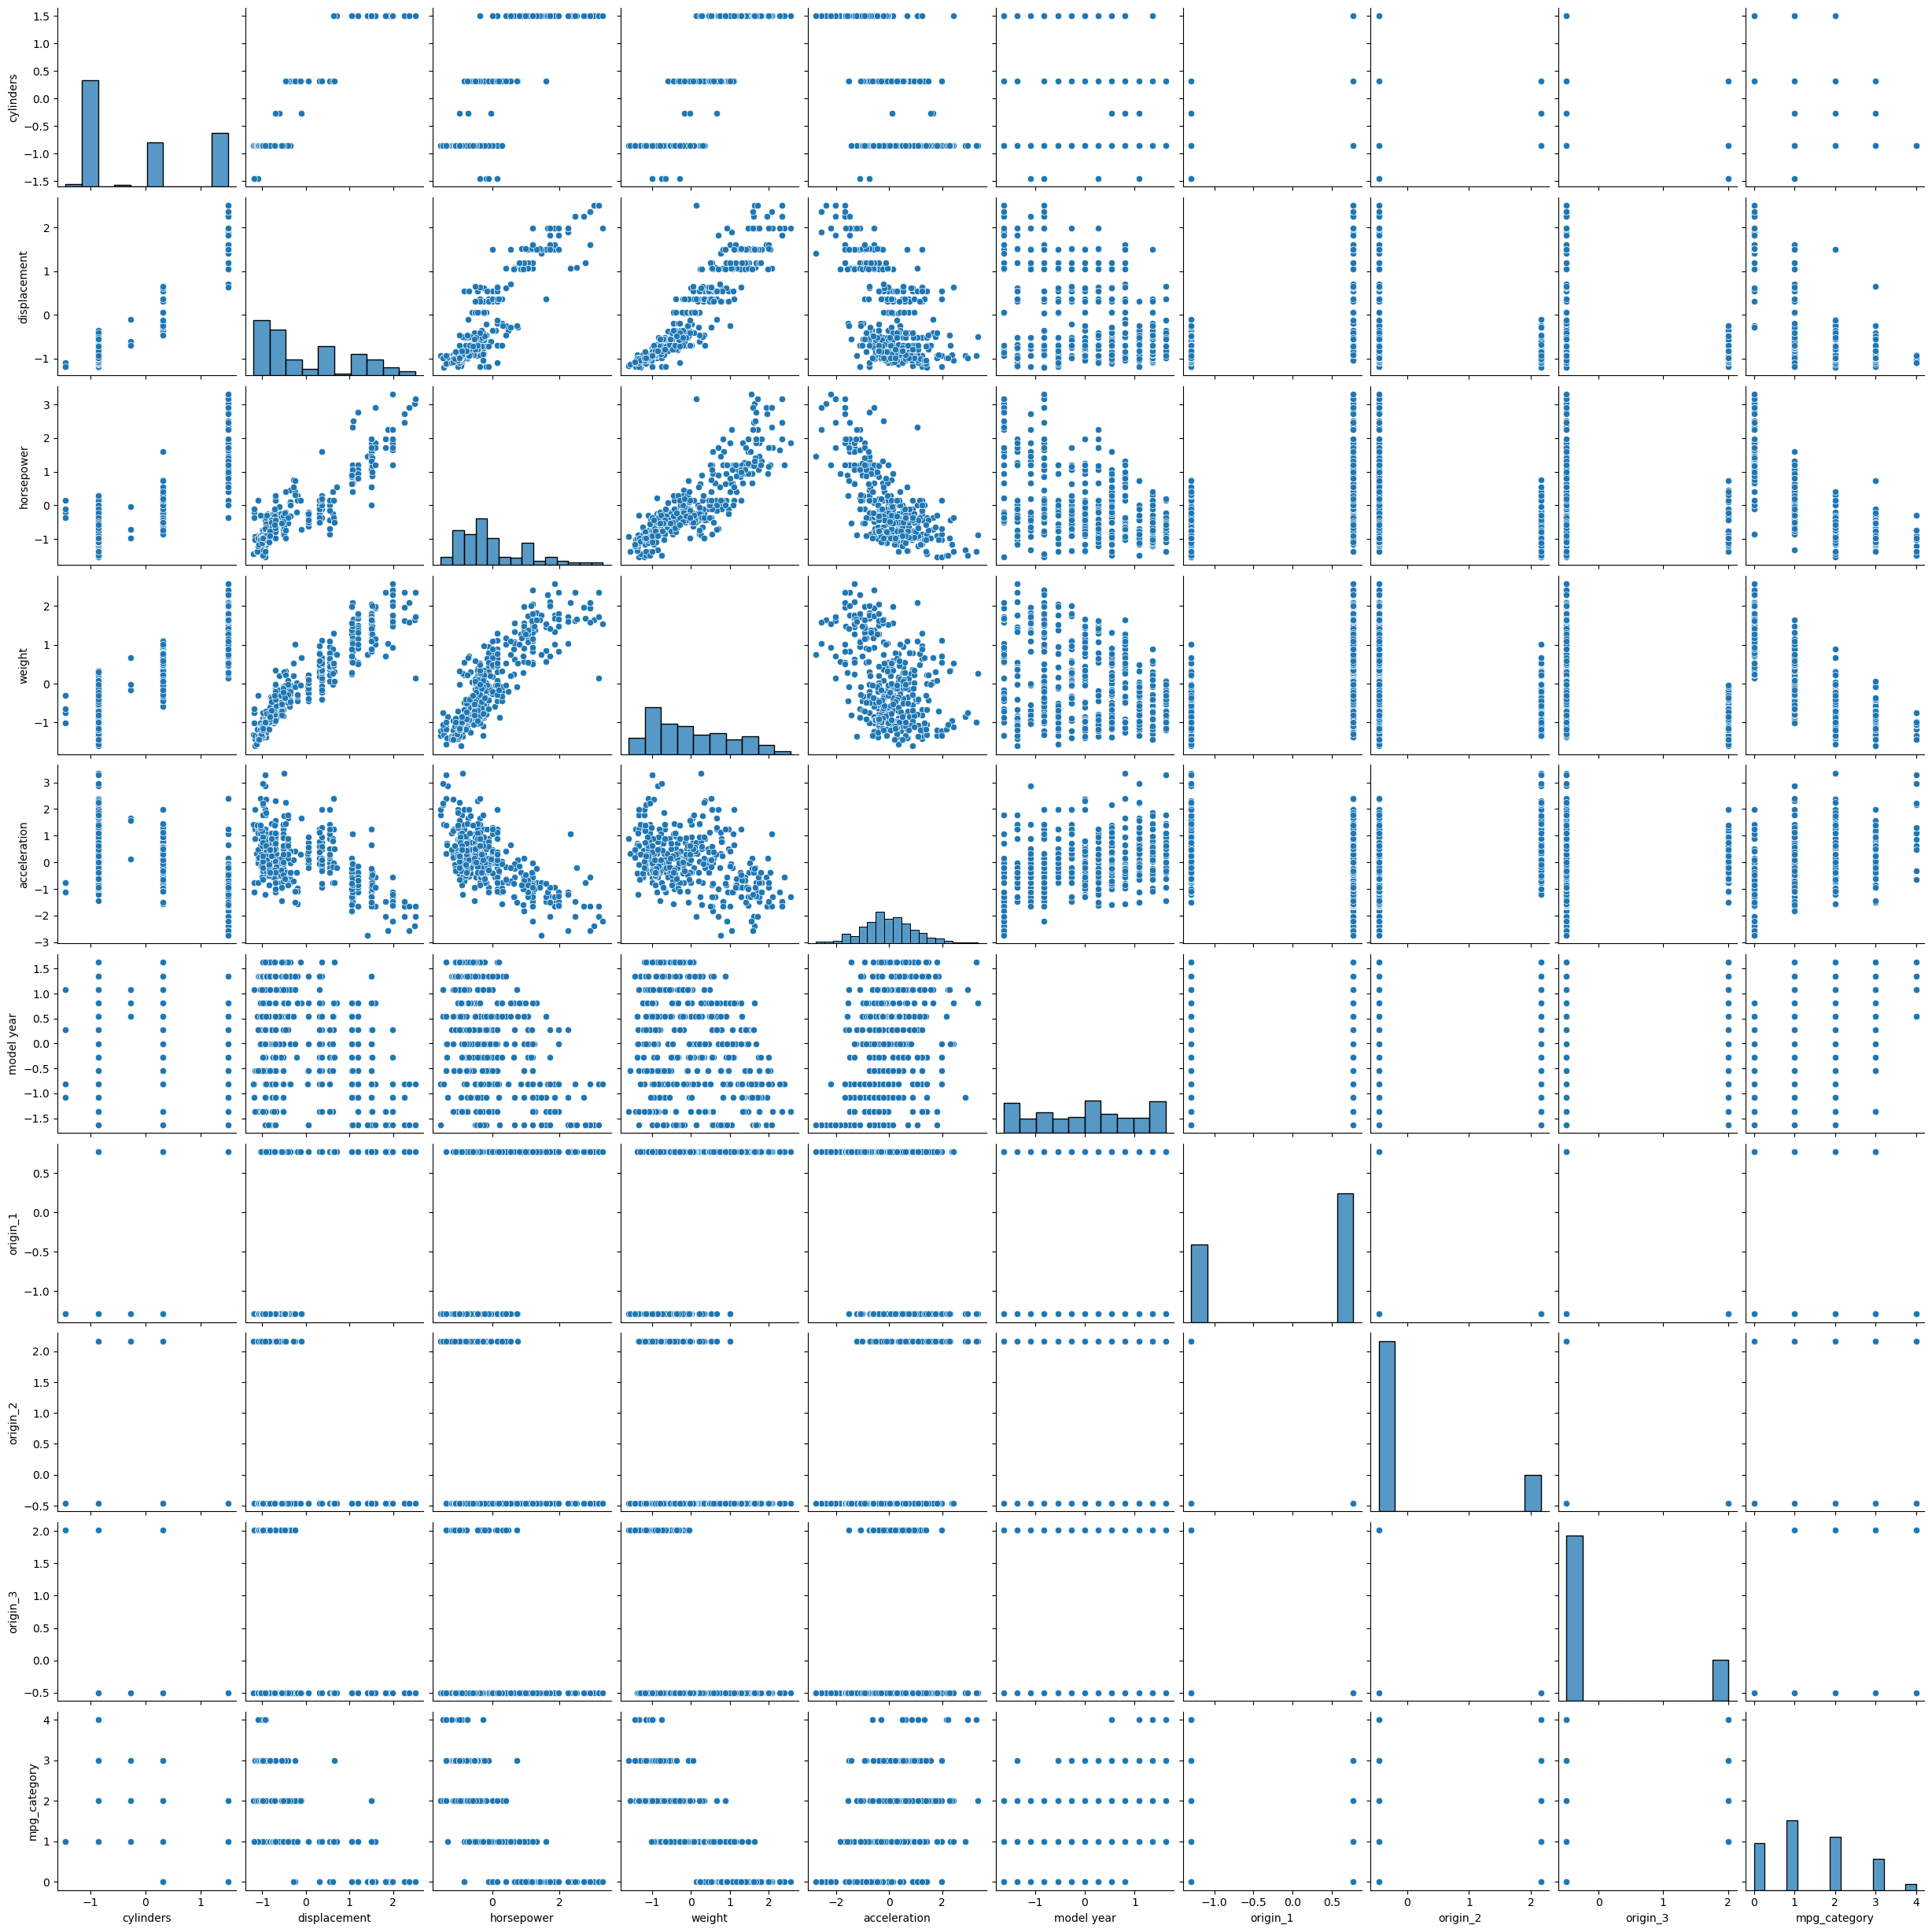

In [17]:
# Matriz de gráficos de dispersión
sns.pairplot(df_scaled)
plt.show()

In [18]:
# Selección de características con SelectKBest
X = df_scaled.drop(columns=['mpg_category'])
k_best = SelectKBest(score_func=f_regression, k=5)
X_new = k_best.fit_transform(X, y)
selected_features = X.columns[k_best.get_support()]
print("Características seleccionadas:", selected_features)

Características seleccionadas: Index(['cylinders', 'displacement', 'horsepower', 'weight', 'model year'], dtype='object')


4 Entrenamientos

In [34]:
# Comparar SelectKBest vs PCA
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2, random_state=42)
X_train_pca, X_test_pca, _, _ = train_test_split(X_pca, y, test_size=0.2, random_state=42)

In [19]:
# Separar datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2, random_state=42)

In [51]:
# Entrenamiento SIN Cross con SelectKBest
model = GaussianNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [39]:
# Evaluación del modelo con SelectKBest
accuracy = accuracy_score(y_test, y_pred)
print("Precisión del modelo con SelectKBest sin Cross:", accuracy)
print("Reporte de clasificación con SelectKBest:\n", classification_report(y_test, y_pred))
print("Matriz de confusión con SelectKBest:\n", confusion_matrix(y_test, y_pred))

Precisión del modelo con SelectKBest sin Cross: 0.6125
Reporte de clasificación con SelectKBest:
               precision    recall  f1-score   support

           0       0.74      1.00      0.85        17
           1       0.88      0.50      0.64        28
           2       0.64      0.70      0.67        23
           3       0.25      0.09      0.13        11
           4       0.08      1.00      0.15         1

    accuracy                           0.61        80
   macro avg       0.52      0.66      0.49        80
weighted avg       0.68      0.61      0.62        80

Matriz de confusión con SelectKBest:
 [[17  0  0  0  0]
 [ 6 14  8  0  0]
 [ 0  2 16  3  2]
 [ 0  0  1  1  9]
 [ 0  0  0  0  1]]


In [ ]:
# CON Cross con SelectKBest
model = GaussianNB()
skf = StratifiedKFold(n_splits=5)
conf_matrix_sum = None
all_reports = []

for train_index, test_index in skf.split(X_new, y):
    X_train, X_test = X_new[train_index], X_new[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Matriz de confusión
    conf_matrix = confusion_matrix(y_test, y_pred)
    if conf_matrix_sum is None:
        conf_matrix_sum = conf_matrix
    else:
        conf_matrix_sum += conf_matrix

    # Reporte de clasificación
    report = classification_report(y_test, y_pred, output_dict=True)
    all_reports.append(report)

c:\Users\DevRoger\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\DevRoger\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\DevRoger\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [50]:
# Promediar métricas por categoría
categories = [str(i) for i in range(num_bins)]
final_report = {cat: {"precision": 0, "recall": 0, "f1-score": 0, "support": 0} for cat in categories}

for report in all_reports:
    for cat in categories:
        final_report[cat]["precision"] += report[cat]["precision"]
        final_report[cat]["recall"] += report[cat]["recall"]
        final_report[cat]["f1-score"] += report[cat]["f1-score"]
        final_report[cat]["support"] += report[cat]["support"]

# Promediar los valores
for cat in categories:
    final_report[cat]["precision"] /= len(all_reports)
    final_report[cat]["recall"] /= len(all_reports)
    final_report[cat]["f1-score"] /= len(all_reports)

# Imprimir reporte consolidado
print("Reporte promedio por categoría:")
print("               precision    recall  f1-score   support")
for cat, metrics in final_report.items():
    print(f"           {cat}       {metrics['precision']:.2f}      {metrics['recall']:.2f}      {metrics['f1-score']:.2f}   {int(metrics['support'])}")

print("\nMatriz de confusión promedio:")
print(conf_matrix_sum)

# Precisión promedio general
cv_scores = cross_val_score(model, X_new, y, cv=skf, scoring='accuracy')
mean_accuracy = np.mean(cv_scores)
print("\nPrecisión promedio con validación cruzada usando SelectKBest:", mean_accuracy)


Reporte promedio por categoría:
               precision    recall  f1-score   support
           0       0.85      0.88      0.86   91
           1       0.82      0.56      0.65   134
           2       0.51      0.64      0.56   102
           3       0.26      0.10      0.14   60
           4       0.19      1.00      0.31   11

Matriz de confusión promedio:
[[80 11  0  0  0]
 [14 75 45  0  0]
 [ 0  8 66  5 23]
 [ 0  2 16  6 36]
 [ 0  0  0  0 11]]

Precisión promedio con validación cruzada usando SelectKBest: 0.598006329113924


In [42]:
# Aplicación de PCA para reducción de dimensionalidad
pca = PCA(n_components=5)
X_pca = pca.fit_transform(X)
print("Varianza explicada por cada componente PCA:", pca.explained_variance_ratio_)

Varianza explicada por cada componente PCA: [0.55845482 0.14353551 0.13195466 0.07827507 0.06297889]


In [43]:
# Entrenamiento sin validación cruzada con PCA
model.fit(X_train_pca, y_train)
y_pred_pca = model.predict(X_test_pca)

In [44]:
# Evaluación del modelo con PCA
accuracy_pca = accuracy_score(y_test, y_pred_pca)
print("Precisión del modelo con PCA:", accuracy_pca)
print("Reporte de clasificación con PCA:\n", classification_report(y_test, y_pred_pca))
print("Matriz de confusión con PCA:\n", confusion_matrix(y_test, y_pred_pca))

Precisión del modelo con PCA: 0.7375
Reporte de clasificación con PCA:
               precision    recall  f1-score   support

           0       0.81      1.00      0.89        17
           1       0.78      0.64      0.71        28
           2       0.62      0.70      0.65        23
           3       0.78      0.64      0.70        11
           4       1.00      1.00      1.00         1

    accuracy                           0.74        80
   macro avg       0.80      0.79      0.79        80
weighted avg       0.74      0.74      0.73        80

Matriz de confusión con PCA:
 [[17  0  0  0  0]
 [ 4 18  6  0  0]
 [ 0  5 16  2  0]
 [ 0  0  4  7  0]
 [ 0  0  0  0  1]]
